<a href="https://colab.research.google.com/github/fionisarnen/shape-detection-circular-hough-transform/blob/master/Tubes_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proses Deteksi Objek dari Background yang kompleks**

1. Preprocessing

   Proses ekualisasi histogram gambar, hal ini dilakukan agar kontras pada gambar akan semakin tajam. Hal tersebut membantu untuk proses pendeteksian objek

2. Color Processing

   Tahap ini dilakukan untuk menghilangkan objek yang tidak diperlukan. Dapat dicapai dengan menggunakan oprasi thresholding. 

3. Image Segmentation

   Image segmentation dilakukan untuk mendeteksi tepian objek pada gambar. Image Segmentation dilakukan dengan menggunakan metode otsu.

4. Circular Hough Transform
   
   Setelah dilakukan image segmentation, proses selanjutnya yang dilakukan adalah dengan melakukan metode CHT untuk mendeteksi bentuk lingkaran pada gambar

In [0]:
from google.colab import files,drive
from skimage import io, color, exposure, color, filters, viewer, transform, feature, draw
import math
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/skimage/viewer/__init__.py:6: UserWarning: Viewer requires Qt
  warn('Viewer requires Qt')


In [0]:
uploaded = files.upload()
namaFile = list(uploaded.keys())[0]

Saving harga-bibit-mangga-gedong-gincu.jpg to harga-bibit-mangga-gedong-gincu.jpg


Load gambar dengan menggunakan library *skimage*

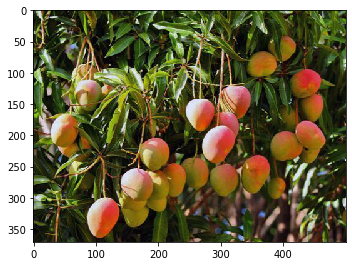

In [0]:
#Load Image
image = io.imread("harga-bibit-mangga-gedong-gincu.jpg")

fig,ax = plt.subplots(figsize=(5,10))
io.imshow(image)
plt.show()

Lakukan preprocessing gambar dengan melakukan ekualisasi histogram pada gambar

/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:124: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


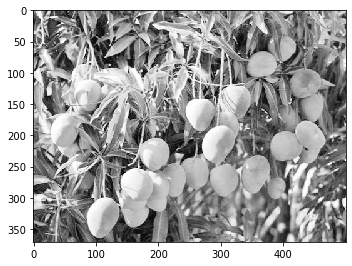

In [0]:
# Lakukan operasi ekualisasi pada gambar agar gambar menjadi lebih kontras
preprocessing = exposure.equalize_hist(image)

#Ubah gambar menjadi grayscale
grayscale = color.rgb2gray(preprocessing)

fig,ax = plt.subplots(figsize=(5,10))
io.imshow(grayscale)
plt.show()

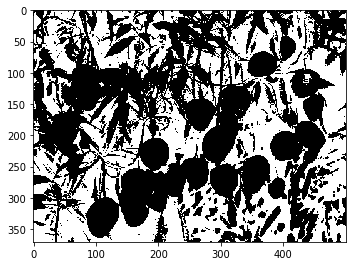

In [0]:
# Melakukan binary thresholding dengan menggunakan metode otsu
t = filters.threshold_otsu(grayscale)
mask = grayscale < t

# Untuk melihat hasil dari thresholding 
sel = np.zeros_like(image)
sel[mask] = image[mask]

fig,ax = plt.subplots(figsize=(5,10))
io.imshow(mask)
plt.show()

Setelah melakukan thresholding, proses deteksi tepi objek dilakukan dengan menggunakan algoritma canny

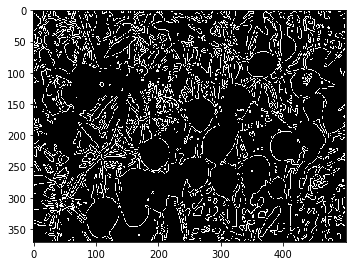

In [0]:
fig,ax = plt.subplots(figsize=(5,10))
edge = feature.canny(mask,sigma=1)
io.imshow(edge)

Setelah melakukan deteksi tepi hal yang selanjutnya dilakukan adalah dengan melakukan proses CHT pada gambar.

5


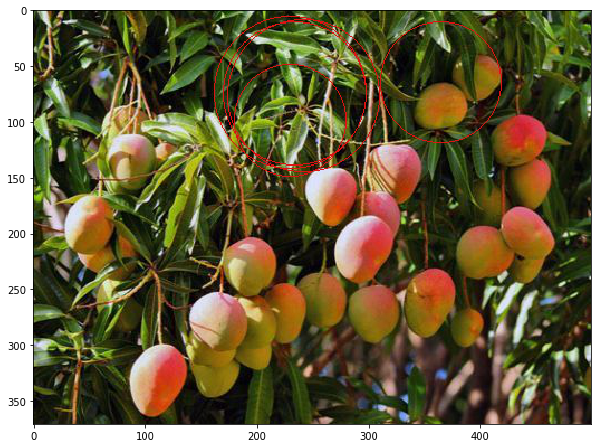

In [0]:
hough_radii = np.arange(50,120,2)
hough_res = transform.hough_circle(edge,hough_radii)
accums, cx, cy, radii = transform.hough_circle_peaks(hough_res, hough_radii,total_num_peaks=5)

fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(10,15))
count = 0
for center_y, center_x, radius in zip(cy,cx,radii):
  circy, circx = draw.circle_perimeter(center_y, center_x, radius,shape=edge.shape)
  image[circy,circx] = (220,20,20)
  count = count + 1
  
print(count)
ax.imshow(image, cmap=plt.cm.gray)
plt.show()